In [7]:
import os
import numpy as np
import copy




import resnet

import gesturedata
import torch
import torchvision.datasets as dset
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import math
from torch.autograd import Variable
from torch.utils.data import sampler
import torch.nn.functional as F
from skimage import io, transform


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

import timeit, random
import json,cv2
import show

%load_ext autoreload
%autoreload 2

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

data = gesturedata.HandGestureDataset("Dataset/", transform=False)




torch.cuda.empty_cache()
train_dataloader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True, num_workers=6)
gpu_dtype = torch.cuda.FloatTensor

print_every = 100
model_res = models.resnet18(pretrained=True)

model = resnet.PoseEstimator(copy.deepcopy(model_res)).type(gpu_dtype)
model.load_state_dict(torch.load('resnet_model.pt'))



In [9]:
def visualize_output(model):
    num = 4
    fix, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax = [a for b in ax for a in b] # wooooo

    model.eval()
    for i in range(len(data)):
        name, x, y, orig = data[i]
        y = np.array(y.data, dtype=int).reshape(21,2)
        #x_var = torch.cuda.FloatTensor(x).view(1,3,128,128)
        x_var = torch.cuda.FloatTensor(orig).view(1,3,224,224)
        scores = model(x_var)

        y_hat = np.array(scores.data, dtype=int).reshape(21,2)
        plt.tight_layout()
        ax[i].set_title(name)
        ax[i].axis('off')

        canvas = show.draw_hand(orig, y_hat)

        ax[i].imshow(canvas) 

        if i == num-1:
            plt.show()
            break

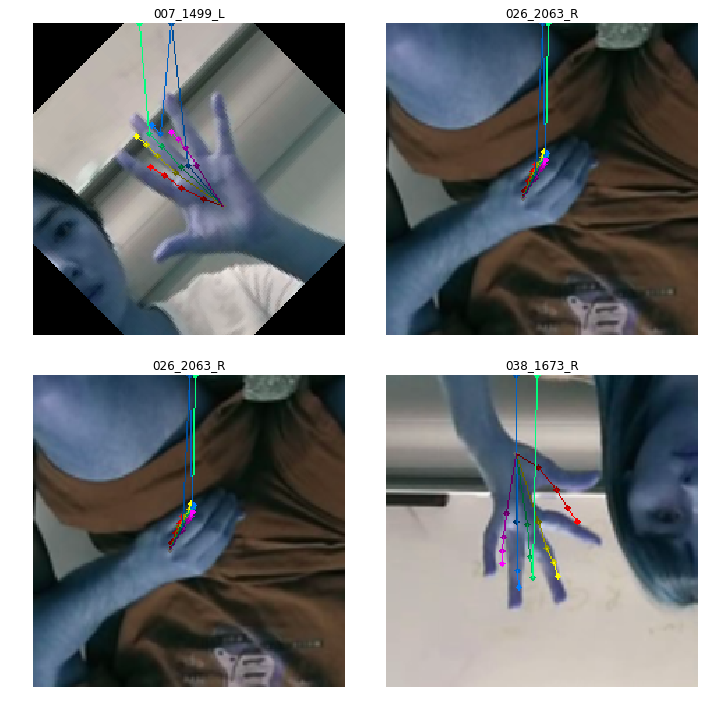

In [10]:
visualize_output(model)